
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E02_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

In [355]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

# A)

table = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi")

df = table[6]
df.rename(columns={"Unnamed: 0": "År", "Medel- folkmängd": "Befolkning"}, inplace=True)
df

,År,Befolkning,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270.0,168.0,102.0,402.0
1,1901,5 156 000,139 370,82 772,56 598,270.0,161.0,110.0,404.0
2,1902,5 187 000,137 364,79 722,57 642,265.0,154.0,111.0,395.0
3,1903,5 210 000,133 896,78 610,55 286,257.0,151.0,106.0,382.0
4,1904,5 241 000,134 952,80 152,54 800,257.0,153.0,105.0,383.0
5,1905,5 278 000,135 409,82 443,52 966,257.0,156.0,100.0,383.0
6,1906,5 316 000,136 620,76 366,60 254,257.0,144.0,113.0,381.0
7,1907,5 357 000,136 793,78 149,58 644,255.0,146.0,109.0,377.0
8,1908,5 404 000,138 874,80 568,58 306,257.0,149.0,108.0,379.0
9,1909,5 453 000,139 505,74 538,64 967,256.0,137.0,119.0,371.0


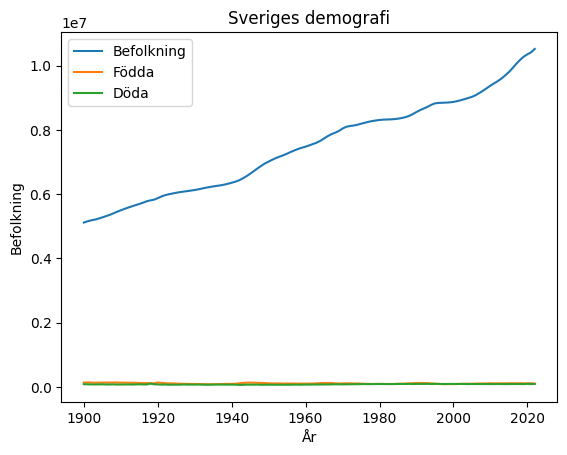

,År,Befolkning,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270.0,168.0,102.0,402.0
1,1901,5156000,139370,82772,56598,270.0,161.0,110.0,404.0
2,1902,5187000,137364,79722,57642,265.0,154.0,111.0,395.0
3,1903,5210000,133896,78610,55286,257.0,151.0,106.0,382.0
4,1904,5241000,134952,80152,54800,257.0,153.0,105.0,383.0
5,1905,5278000,135409,82443,52966,257.0,156.0,100.0,383.0
6,1906,5316000,136620,76366,60254,257.0,144.0,113.0,381.0
7,1907,5357000,136793,78149,58644,255.0,146.0,109.0,377.0
8,1908,5404000,138874,80568,58306,257.0,149.0,108.0,379.0
9,1909,5453000,139505,74538,64967,256.0,137.0,119.0,371.0


In [356]:
import matplotlib.pyplot as plt
import seaborn as sns 
# b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.


# Tog bort alla mellanslag och kommatecken i värderna för kolumner mellan 1 och 5.
df.iloc[:, 1:5] = df.iloc[:, 1:5].map(lambda x: x.replace(" ","").split(",")[0])
# df["Befolkning"] = pd.to_numeric(df["Befolkning"])
df = df.apply(pd.to_numeric, errors='coerce')
df_stor = df

# plt.plot(df["År"], df["Befolkning"])
# plt.show()

sns.lineplot(x="År", y="Befolkning", data=df, label="Befolkning")
sns.lineplot(x="År", y="Födda", data=df, label="Födda")
sns.lineplot(x="År", y="Döda", data=df, label="Döda")
plt.legend()
plt.title('Sveriges demografi')
plt.xlabel("År")
plt.ylabel('Befolkning')
plt.show()

df_stor

In [357]:
df1 = table[1]
df2 = df1.head(10)
df2

Vid utgången av år   Folkmängd Årlig tillväxt         
  Vid utgången av år   Folkmängd         Totalt Promille
0               1570     900 000              —        —
1               1650   1 225 000          4 063      386
2               1700   1 485 000          5 200      386
3               1720   1 350 000         −6 750    −4,75
4               1755   1 878 000         15 086      948
5               1815   2 465 000          9 783      454
6               1865   4 099 000         32 680     1022
7               1900   5 140 000         29 743      648
8               2000   8 861 000            NaN      NaN
9               2020  10 379 000            NaN      NaN

C:\Users\emil_\AppData\Local\Temp\ipykernel_8060\1432203519.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


,År,Befolkning
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000
7,1900,5140000
8,2000,8861000
9,2020,10379000


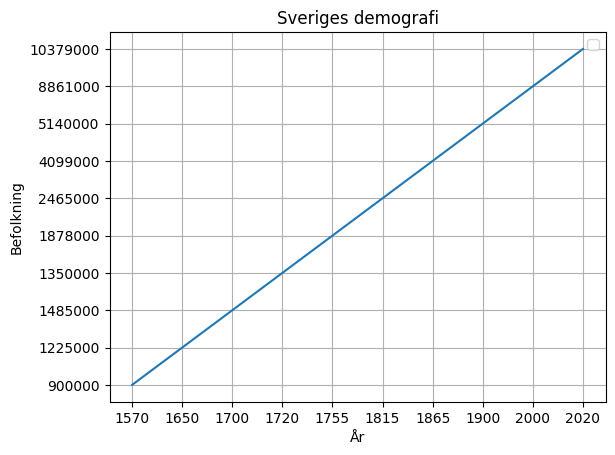

In [358]:
# Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. 
# Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

df1 = table[1]
df2 = df1.head(10)

df_flattened = df2.reset_index()
df_flattened.columns = ['_'.join(col).strip() for col in df_flattened.columns.values]
df = df_flattened
df.rename(columns={"Vid utgången av år_Vid utgången av år": "År", "Folkmängd_Folkmängd": "Befolkning"}, inplace=True)
df = df.iloc[:, 1:]
df = df.iloc[:, 0:2]
df = df.replace(r"\s*\.*", "", regex = True) #Fråga Raffe
df1 = df


plt.plot(df["År"], df["Befolkning"])
# sns.lineplot(x="År", y="Befolkning", data=df, label="Befolkning")
plt.plot
plt.grid(True)
plt.legend()
plt.title('Sveriges demografi')
plt.xlabel("År")
plt.ylabel('Befolkning')
df1





In [359]:
# d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. 
# Also you may be able to do this in several ways.

dfc = pd.concat([df_stor,df], ignore_index=True)
pd.set_option('display.max_rows', 133)
sort = dfc.sort_values("Befolkning")
df = sort

df

TypeError: '<' not supported between instances of 'str' and 'int'

133
133
0
0


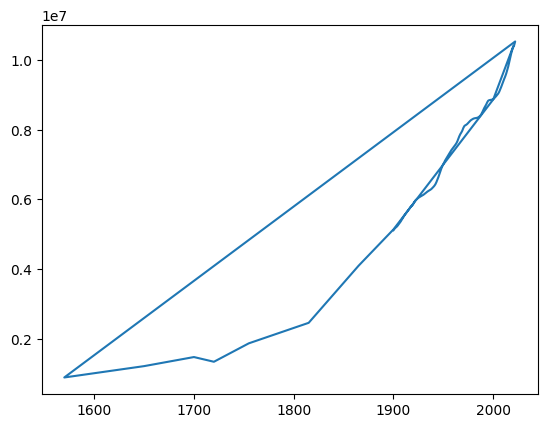

In [354]:
# e) Draw a graph of population data from 1570-2020.
#TODO :Fixa sorteringen i Befolkning

print(len(df["År"]))
print(len(df["Befolkning"]))
print(df['År'].isnull().sum())
print(df['Befolkning'].isnull().sum())

plt.plot(df["År"], df["Befolkning"])

---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---